In [4]:
import numpy as np
import pandas as pd
import gender_guesser.detector as gender
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sbn

g = gender.Detector()

df1= pd.DataFrame(pd.read_csv("partialfile1.csv"))
df2 = pd.DataFrame(pd.read_csv("partialfile2.csv"))

df = pd.concat([df1, df2])
df

,film,prod_team,dir_team,director,camera_team,prod_manage_team,depth,download_timeout,download_slot,download_latency,year,country
0,Morgan,"Aidan Elliott,George F. Heller,Elishia Holmes,...","William Dodds,Terry Loane,Ciara McIlraith,Brea...",Luke Scott,"Jennifer Atcheson,Ryan Douglas,Damien Elliott,...",NaN,3,180.0,www.imdb.com,0.183012,1 September 2016,"Kuwait,Ukraine,Canada,UK,Ireland,Lithuania,Pak..."
1,Project X,"Scott Budnick,Marty P. Ewing,Alex Heineman,Tod...","Imhotep Coleman,Allan Graf,Michael Neumann,Pau...",Nima Nourizadeh,"Joseph Aguirre,Denise Brady,Mike Byrd,Jeremy C...",NaN,3,180.0,www.imdb.com,0.153853,1 March 2012,"Australia,Netherlands,New Zealand,Canada,UK,Ir..."
2,Prodigy,"Alex Haughey,Hisonni Johnson,Ted Phillips,Bria...",Colleen Dallons,"Alex Haughey,Brian Vidal",Adam Hamer,NaN,3,180.0,www.imdb.com,0.125008,4 March 2017,"USA,USA,USA,USA,Germany"
3,What Keeps You Alive,"Brittany Allen,Chris Ball,Brandon Christensen,...",Braden Croft,Colin Minihan,"Steele Fernandes,Thommy Morais,Blanka Szabo",NaN,3,180.0,www.imdb.com,0.126824,4 January 2018,"Norway,USA,USA,Australia,Canada,USA,USA,South ..."
4,Bone Tomahawk,"Iain Abrahams,Jonathan Feuer,Scott Fort,Joseph...","Heather I. Denton,Dave Halls,Zak Kristofek",S. Craig Zahler,"Steve Albovias,Verlon Allen III,Adam Beffa,Rin...",NaN,3,180.0,www.imdb.com,0.138790,1 October 2015,"USA,USA,USA,UK,Spain,USA,UK,Germany,Russia,Sin..."
5,Sausage Party,"David Distenfeld,Megan Ellison,Pilar Flynn,Bru...",NaN,"Greg Tiernan,Conrad Vernon","Tyson Birmann,Ryan Guzdzial",NaN,3,180.0,www.imdb.com,0.167106,2016,"Indonesia,USA,Canada,Colombia,Georgia,Israel,S..."
6,The Neon Demon,"Michael Bassick,Lene Børglum,Manuel Chiche,Bra...","John Nasraway,Rod Smith,Stephanie Tull",Nicolas Winding Refn,"Rudy Arrieta,Dylan Buck,Sebastian Bueno,Gunthe...",NaN,3,180.0,www.imdb.com,0.147016,20 May 2016,"France,UK,France,France,Italy,Denmark,Finland,..."
7,Sherlock Holmes,"Bruce Berman,Steve Clark-Hall,Susan Downey,Pet...","Matthew Baker,Andrew Fiero,Clare Glass,Lee Gru...",Guy Ritchie,"Michael Arisohn,Alex Bailey,Dave Brennan,Jason...",NaN,3,180.0,www.imdb.com,0.203928,14 December 2009,"UK,Bahrain,Hong Kong,Croatia,South Korea,Kuwai..."
8,Disobedience,"Naomi Alderman,Glen Basner,Daniel Battsek,Ben ...","Simon Hedges,James R. Kipping,Jason Rickwood,K...",Sebastián Lelio,"Johan Heurlin Aidt,Leo Alvarez,William Anderso...",NaN,3,180.0,www.imdb.com,0.136198,10 September 2017,"Canada,Sweden,Mexico,Argentina,Hungary,Russia,..."
9,Zootopia,"Monica Lago-Kaytis,John Lasseter,Brad Simonsen...",NaN,"Byron Howard,Rich Moore,Jared Bush","Thomas Baker,Mark Henley,Brian Leach,Nathan Wa...",NaN,3,180.0,www.imdb.com,0.141154,11 February 2016,"Denmark,Spain,Belgium,France,Indonesia,Netherl..."


In [5]:
df.drop(labels=['depth', "download_timeout", "download_slot", "download_latency", "prod_manage_team"], axis =1, inplace=True)
df.dropna(subset=['year'])
df = df.fillna('')



In [6]:
year_list = df.year.tolist()

formatted_years= []

for year in year_list:
    if isinstance(year, int):
        year = year
        pass
    
    elif year.strip().count(' ') != 0:
        try: 
            year = int(datetime.strptime(year,'%d %B %Y').strftime('%Y'))
        except:
            year = int(datetime.strptime(year,'%B %Y').strftime('%Y'))
    else:
        if len(year.strip()) != 0:
            year = int(year)
    formatted_years.append(year) 


df['year'] = formatted_years


In [7]:

df = df.loc[df['year'] != '',:]




df['year'] = df['year'].astype(int)

In [8]:
df

,film,prod_team,dir_team,director,camera_team,year,country
0,Morgan,"Aidan Elliott,George F. Heller,Elishia Holmes,...","William Dodds,Terry Loane,Ciara McIlraith,Brea...",Luke Scott,"Jennifer Atcheson,Ryan Douglas,Damien Elliott,...",2016,"Kuwait,Ukraine,Canada,UK,Ireland,Lithuania,Pak..."
1,Project X,"Scott Budnick,Marty P. Ewing,Alex Heineman,Tod...","Imhotep Coleman,Allan Graf,Michael Neumann,Pau...",Nima Nourizadeh,"Joseph Aguirre,Denise Brady,Mike Byrd,Jeremy C...",2012,"Australia,Netherlands,New Zealand,Canada,UK,Ir..."
2,Prodigy,"Alex Haughey,Hisonni Johnson,Ted Phillips,Bria...",Colleen Dallons,"Alex Haughey,Brian Vidal",Adam Hamer,2017,"USA,USA,USA,USA,Germany"
3,What Keeps You Alive,"Brittany Allen,Chris Ball,Brandon Christensen,...",Braden Croft,Colin Minihan,"Steele Fernandes,Thommy Morais,Blanka Szabo",2018,"Norway,USA,USA,Australia,Canada,USA,USA,South ..."
4,Bone Tomahawk,"Iain Abrahams,Jonathan Feuer,Scott Fort,Joseph...","Heather I. Denton,Dave Halls,Zak Kristofek",S. Craig Zahler,"Steve Albovias,Verlon Allen III,Adam Beffa,Rin...",2015,"USA,USA,USA,UK,Spain,USA,UK,Germany,Russia,Sin..."
5,Sausage Party,"David Distenfeld,Megan Ellison,Pilar Flynn,Bru...",,"Greg Tiernan,Conrad Vernon","Tyson Birmann,Ryan Guzdzial",2016,"Indonesia,USA,Canada,Colombia,Georgia,Israel,S..."
6,The Neon Demon,"Michael Bassick,Lene Børglum,Manuel Chiche,Bra...","John Nasraway,Rod Smith,Stephanie Tull",Nicolas Winding Refn,"Rudy Arrieta,Dylan Buck,Sebastian Bueno,Gunthe...",2016,"France,UK,France,France,Italy,Denmark,Finland,..."
7,Sherlock Holmes,"Bruce Berman,Steve Clark-Hall,Susan Downey,Pet...","Matthew Baker,Andrew Fiero,Clare Glass,Lee Gru...",Guy Ritchie,"Michael Arisohn,Alex Bailey,Dave Brennan,Jason...",2009,"UK,Bahrain,Hong Kong,Croatia,South Korea,Kuwai..."
8,Disobedience,"Naomi Alderman,Glen Basner,Daniel Battsek,Ben ...","Simon Hedges,James R. Kipping,Jason Rickwood,K...",Sebastián Lelio,"Johan Heurlin Aidt,Leo Alvarez,William Anderso...",2017,"Canada,Sweden,Mexico,Argentina,Hungary,Russia,..."
9,Zootopia,"Monica Lago-Kaytis,John Lasseter,Brad Simonsen...",,"Byron Howard,Rich Moore,Jared Bush","Thomas Baker,Mark Henley,Brian Leach,Nathan Wa...",2016,"Denmark,Spain,Belgium,France,Indonesia,Netherl..."


In [9]:
def get_gender_count(df_column):
    name_list = df_column.str.split(',')
    first_names = name_list.map(lambda x: [y.split(' ')[0] for y in x])
    gender_list = first_names.map(lambda x: [g.get_gender(y) for y in x])
    male_count = gender_list.map(lambda x: x.count("male"))
    female_count = gender_list.map(lambda x: x.count("female"))
    unknown_count=gender_list.map(lambda x: x.count('unknown'))
    andy_count = gender_list.map(lambda x: x.count('andy'))
    unknown_count += andy_count
    return (male_count, female_count, unknown_count) 

prod_team_m, prod_team_f, prod_team_u  = get_gender_count(df.prod_team)
dir_team_m,dir_team_f, dir_team_u = get_gender_count(df.dir_team)
director_m, director_f, director_u = get_gender_count(df.director)
camera_team_m, camera_team_f, camera_team_u = get_gender_count(df.camera_team)


total_m = sum([prod_team_m, dir_team_m, director_m, camera_team_m])
total_f = sum([prod_team_f, dir_team_f, director_f, camera_team_f])
total_u = sum([prod_team_u, dir_team_u, director_u, camera_team_u])

gender_df = pd.DataFrame({ "film": df['film'],
                          "year":df['year'],
                          "prod_team_m":prod_team_m, 
                          "prod_team_f": prod_team_f,
                          "prod_team_u": prod_team_u,
                          "dir_team_m": dir_team_m, 
                          "dir_team_f": dir_team_f,
                          "dir_team_u": dir_team_u,
                          "director_m": director_m, 
                          "director_f": director_f, 
                          "director_u": director_u,
                          "camera_team_m": camera_team_m, 
                          "camera_team_f": camera_team_f, 
                          "camera_team_u" : camera_team_u,
                          "total_m": total_m, 
                          "total_f": total_f,
                          "total_u" : total_u})

gender_df

,film,year,prod_team_m,prod_team_f,prod_team_u,dir_team_m,dir_team_f,dir_team_u,director_m,director_f,director_u,camera_team_m,camera_team_f,camera_team_u,total_m,total_f,total_u
0,Morgan,2016,5,0,1,3,3,0,1,0,0,14,2,1,23,5,2
1,Project X,2012,6,0,0,3,1,1,0,0,0,37,3,3,46,4,4
2,Prodigy,2017,4,0,1,0,1,0,2,0,0,1,0,0,7,1,1
3,What Keeps You Alive,2018,7,1,0,1,0,0,1,0,0,1,1,1,10,2,1
4,Bone Tomahawk,2015,11,1,1,2,1,0,0,0,1,31,4,3,44,6,5
5,Sausage Party,2016,9,4,0,0,0,1,2,0,0,1,0,0,12,4,1
6,The Neon Demon,2016,14,3,2,2,1,0,1,0,0,23,3,0,40,7,2
7,Sherlock Holmes,2009,7,2,0,11,5,2,1,0,0,81,2,1,100,9,3
8,Disobedience,2017,8,8,0,3,1,0,1,0,0,33,2,1,45,11,1
9,Zootopia,2016,3,1,0,0,0,1,2,0,0,4,0,0,9,1,1


In [11]:
gender_df['prod_percent_f'] =  round(((gender_df.prod_team_f + .5 * gender_df.prod_team_u) /(gender_df.prod_team_m + 
                                                                                     gender_df.prod_team_f +
                                                                                    gender_df.prod_team_u)*100),2)
gender_df['dir_team_percent_f'] = round(((gender_df.dir_team_f + .5*gender_df.dir_team_u)/(gender_df.dir_team_m + 
                                                                                    gender_df.dir_team_f + 
                                                                                    gender_df.dir_team_u)*100),2)
gender_df['dir_percent_f'] = round(((gender_df.director_f + .5 * gender_df.director_u) /(gender_df.director_m + 
                                                                                       gender_df.director_f + 
                                                                                       gender_df.director_u)*100),2)
gender_df['cam_percent_f'] = round(((gender_df.camera_team_f + .5 * gender_df.camera_team_u)/(gender_df.camera_team_m + 
                                                                                       gender_df.camera_team_f + 
                                                                                       gender_df.camera_team_u)*100),2)
gender_df['total_team'] = sum([gender_df.total_m, gender_df.total_f, gender_df.total_u])

gender_df['overall_f_percent'] = round((((total_f + .5 * gender_df.total_u)/gender_df.total_team)*100)   ,2)
gender_df

,film,year,prod_team_m,prod_team_f,prod_team_u,dir_team_m,dir_team_f,dir_team_u,director_m,director_f,...,camera_team_u,total_m,total_f,total_u,prod_percent_f,dir_team_percent_f,dir_percent_f,cam_percent_f,total_team,overall_f_percent
0,Morgan,2016,5,0,1,3,3,0,1,0,...,1,23,5,2,8.33,50.00,0.00,14.71,30,20.00
1,Project X,2012,6,0,0,3,1,1,0,0,...,3,46,4,4,0.00,30.00,NaN,10.47,54,11.11
2,Prodigy,2017,4,0,1,0,1,0,2,0,...,0,7,1,1,10.00,100.00,0.00,0.00,9,16.67
3,What Keeps You Alive,2018,7,1,0,1,0,0,1,0,...,1,10,2,1,12.50,0.00,0.00,50.00,13,19.23
4,Bone Tomahawk,2015,11,1,1,2,1,0,0,0,...,3,44,6,5,11.54,33.33,50.00,14.47,55,15.45
5,Sausage Party,2016,9,4,0,0,0,1,2,0,...,0,12,4,1,30.77,50.00,0.00,0.00,17,26.47
6,The Neon Demon,2016,14,3,2,2,1,0,1,0,...,0,40,7,2,21.05,33.33,0.00,11.54,49,16.33
7,Sherlock Holmes,2009,7,2,0,11,5,2,1,0,...,1,100,9,3,22.22,33.33,0.00,2.98,112,9.38
8,Disobedience,2017,8,8,0,3,1,0,1,0,...,1,45,11,1,50.00,25.00,0.00,6.94,57,20.18
9,Zootopia,2016,3,1,0,0,0,1,2,0,...,0,9,1,1,25.00,50.00,0.00,0.00,11,13.64


In [12]:
# data frames by team
prod_team_df = gender_df.reindex(columns=['film', 'year','prod_team_m', 'prod_team_f', 'prod_percent_f', "total_team"])
dir_team_df = gender_df.reindex(columns=['film', 'year', 'dir_team_m','dir_team_f', 'dir_team_percent_f', "total_team"])
director_df = gender_df.reindex(columns=['film', 'year', 'director_m', 'director_f', 'dir_percent_f', "total_team"])
camera_crew_df = gender_df.reindex(columns=['film', 'year', 'camera_team_m', 'camera_team_f', 'cam_percent_f', "total_team"])



In [13]:
gender_df = gender_df.reindex(columns=['film', 'year', 'prod_percent_f', 'dir_team_percent_f', 'dir_percent_f', 'cam_percent_f', 'overall_f_percent', 'total_m', 'total_f', 'total_u'])








In [14]:
gender_df.sample(10)

,film,year,prod_percent_f,dir_team_percent_f,dir_percent_f,cam_percent_f,overall_f_percent,total_m,total_f,total_u
1455,Dada en die Flower,1986,0.00,50.00,0.0,0.00,12.50,3,0,1
6523,Kismat Konnection,2008,0.00,16.67,0.0,20.00,15.91,16,1,5
5327,The Defender,2004,30.77,50.00,0.0,19.35,24.49,33,8,8
2378,Keepsake,2010,0.00,100.00,0.0,0.00,12.50,7,1,0
5926,Voyager from the Unknown,1997,37.50,0.00,0.0,50.00,23.33,11,3,1
9271,Impulse,1984,0.00,25.00,0.0,0.00,3.33,14,0,1
7791,One Last Thing...,2005,42.86,0.00,0.0,10.29,14.44,37,5,3
7128,Yuen fan,1984,50.00,50.00,NaN,50.00,50.00,0,0,3
9313,London,2005,14.29,33.33,NaN,4.76,9.68,27,2,2
8625,The Man,2005,11.11,22.22,NaN,11.76,14.29,30,5,0


In [15]:
# Drop na values
camera_crew_df.dropna(axis=0, inplace=True)
dir_team_df.dropna(axis=0, inplace=True)
director_df.dropna(axis=0, inplace=True)
camera_crew_df.dropna(axis=0, inplace=True)


In [16]:
# Drop empty teams
prod_team_df = prod_team_df.loc[prod_team_df.prod_team_m + prod_team_df.prod_team_f > 0]
director_df = director_df.loc[director_df.director_m + director_df.director_f > 0]
dir_team_df = dir_team_df.loc[dir_team_df.dir_team_m + dir_team_df.dir_team_f > 0]
camera_crew_df = camera_crew_df.loc[camera_crew_df.camera_team_m + camera_crew_df.camera_team_f > 0]


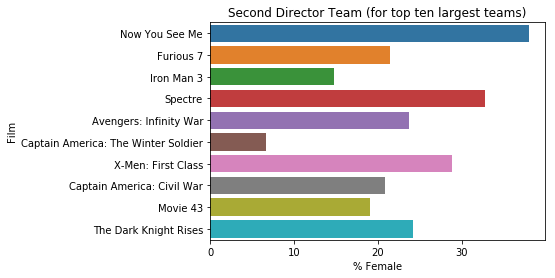

In [17]:
n = 10
dir_team_df.sort_values(by=['total_team','dir_team_percent_f'], ascending=False, inplace=True)
top_dir_teams = dir_team_df.head(n)
top_dir_teams_g = sbn.barplot(x='dir_team_percent_f', y='film', data=top_dir_teams)

plt.title('Second Director Team (for top ten largest teams)')
plt.xlabel('% Female')
plt.ylabel('Film')
sbn.set_context('talk')

            

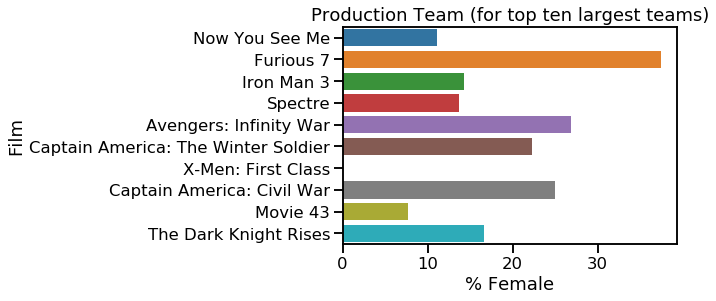

In [18]:
prod_team_df.sort_values(by=['total_team','prod_percent_f'], ascending=False, inplace=True)
top_prod_teams = prod_team_df.head(n)
top_prod_teams_g = sbn.barplot(x='prod_percent_f', y='film', data=top_prod_teams)

plt.title('Production Team (for top ten largest teams)')
plt.xlabel('% Female')
plt.ylabel('Film')
sbn.set_context('talk')



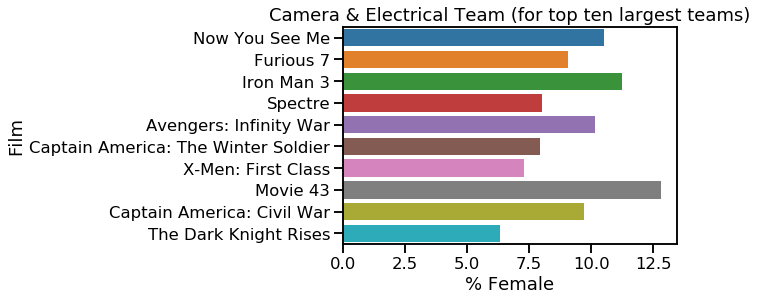

In [19]:
camera_crew_df.sort_values(by=['total_team', 'cam_percent_f'], ascending=False, inplace=True)
top_camera_teams = camera_crew_df.head(n)
top_camera_teams_g = sbn.barplot(x='cam_percent_f', y='film', data=top_camera_teams)

plt.title('Camera & Electrical Team (for top ten largest teams)')
plt.xlabel('% Female')
plt.ylabel('Film')
sbn.set_context('talk')


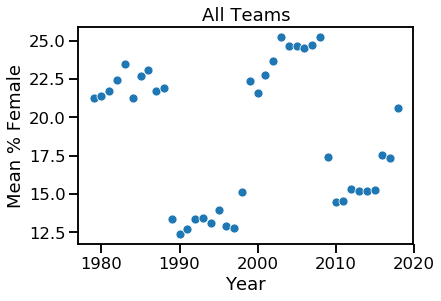

In [74]:

overall_by_year = gender_df.groupby('year', as_index=False).agg({'overall_f_percent': 'mean'})
sbn.scatterplot(x='year', y='overall_f_percent', data=overall_by_year)

plt.title('All Teams')
plt.xlabel('Year')
plt.ylabel('Mean % Female')
sbn.set_context('talk')


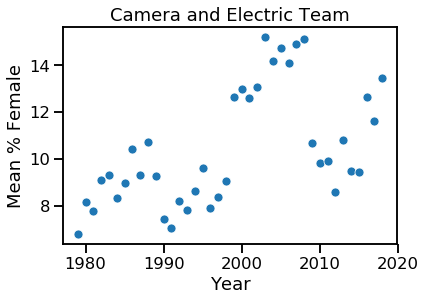

In [22]:
## Camera and electric

cam_scatter_data = camera_crew_df.groupby('year', as_index=False).agg({'cam_percent_f': 'mean'})
camera_crew_scatter = sbn.scatterplot(x='year', y='cam_percent_f', data=cam_scatter_data)

plt.title('Camera and Electric Team')
plt.xlabel('Year')
plt.ylabel('Mean % Female')
sbn.set_context('talk')

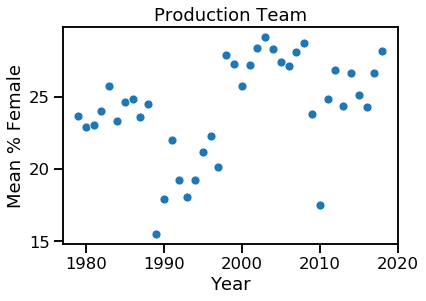

In [71]:
## Production team

prod_scatter_data = prod_team_df.groupby('year', as_index=False).agg({'prod_percent_f': 'mean'})
prod_crew_scatter = sbn.scatterplot(x='year', y='prod_percent_f', data=prod_scatter_data)
plt.title('Production Team')
plt.xlabel('Year')
plt.ylabel('Mean % Female')
sbn.set_context('talk')


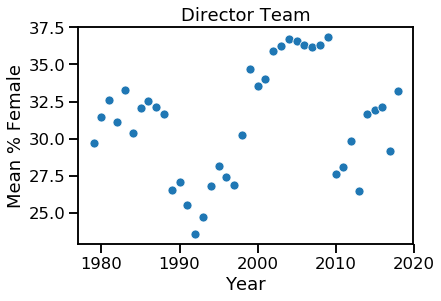

In [73]:
## Director Team

dir_scatter_data = dir_team_df.groupby('year', as_index=False).agg({'dir_team_percent_f': 'mean'})
prod_crew_scatter = sbn.scatterplot(x='year', y='dir_team_percent_f', data=dir_scatter_data)

plt.title('Director Team')
plt.xlabel('Year')
plt.ylabel('Mean % Female')
sbn.set_context('talk')

In [84]:
# after80 = dir_team_df['year'] > 1980
# before90= dir_team_df['year'] <= 1990
# dir_team_df.loc[after80&before90].sample(20)

after80 = df['year'] >= 1980
before90= df['year'] < 1990
df.loc[after80&before90].sample(10)

,film,prod_team,dir_team,director,camera_team,year,country
6949,Necropolis,"Cynthia De Paula,Tim Kincaid,Charles Band",Rebecca Rothbaum,Bruce Hickey,"Don Davis,Ken Davis,Ron Schlaeger,David Shaw",1986,"UK,USA,West Germany"
5006,Hoodwink,"Pom Oliver,Errol Sullivan","Marshall Crosby,Chris Maudson,Mark Turnbull",Claude Whatham,"Colin Chase,David Parker",1981,Australia
4039,Real Bullets,"John Gazarian,Lance Lindsay",,Lance Lindsay,"Shelley Bates,Geraint Bell,Keith Brown,Ed Cole...",1988,West Germany
2356,Jack & Jill sa Amerika,"Vic del Rosario Jr.,Ramon Salvador",,Leroy Salvador,,1988,Philippines
8878,The Buddy System,Alain Chammas,"Peter L. Bergquist,Leslie Jackson Houston,Chri...",Glenn Jordan,"Mark Averill,Mike Benson,Pat Blymyer,John R. L...",1984,"USA,USA,Philippines,Germany"
8931,The Tomb,"Ronnie Hadar,Paul Hertzberg,Richard Kaye,Miria...",Tony Brewster,Fred Olen Ray,"Dave Bergeson,Roxanne di Santo,David E. Elkins...",1986,"UK,USA,West Germany"
8140,Troppo forte,"Augusto Caminito,Sergio Leone,Goffredo Lombardo",Marisa Calia,Carlo Verdone,"Amato Gabotti,Carlo Milani,Mauro Pezzotti",1986,Italy
9161,No Man's Land,"Jack Behr,Tony Ganz,Ron Howard,Sandy Kroopf,Jo...","M. James Arnett,Matt Earl Beesley,Philip Galle...",Peter Werner,"Keith Baber,Michael Everett,David Fay,Robert G...",1987,"USA,Peru,France,Denmark,Sweden,Australia,Finla..."
3990,Paulo Roberto Cotechiño centravanti di sfondam...,Giorgio Venturini,Amanzio Todini,Nando Cicero,"Roberto Belli,Roberto Marsigli,Alfredo Senzacqua",1983,"Italy,Portugal,Hungary"
6948,Carnage,Lew Mishkin,,Andy Milligan,"Andy Milligan,P. Andrew Willis",1984,"Australia,USA,West Germany"


In [21]:
# upper_mask = gender_df['year'] < 1988
# lower_mask = gender_df['year'] >= 1978
# upper_mask2 = gender_df['year'] < 2008
# lower_mask2 = gender_df['year'] >= 1988
# upper_mask3 = gender_df['year'] < 2018
# lower_mask3 = gender_df['year'] >= 2008
# eighties_df = gender_df.loc[upper_mask & lower_mask]

# nineties_df = gender_df.loc[upper_mask2 & lower_mask2]
# aughts_df = gender_df.loc[upper_mask3 & lower_mask3]

# eighties_df = eighties_df.groupby(by = 'year', as_index=False)
# nineties_df = nineties_df.groupby('year', as_index=False)
# aughts_df = aughts_df.groupby('year', as_index=False)

df.loc[df['year']==2010]
gender_df.loc[gender_df['year']==2010]

,film,year,prod_percent_f,dir_team_percent_f,dir_percent_f,cam_percent_f,overall_f_percent,total_m,total_f,total_u
121,Inception,2010,22.22,32.69,0.0,9.56,13.66,142,17,13
198,How to Train Your Dragon,2010,37.50,50.00,0.0,NaN,35.00,6,3,1
223,Scott Pilgrim vs. the World,2010,22.73,19.23,0.0,11.76,13.98,78,11,4
274,Tangled,2010,25.00,50.00,0.0,0.00,18.75,6,1,1
315,Shutter Island,2010,22.73,12.50,0.0,10.22,11.50,97,10,6
320,Kick-Ass,2010,9.09,21.74,0.0,7.94,11.22,85,9,4
322,The Social Network,2010,21.43,4.17,0.0,7.35,7.95,77,3,8
342,Harry Potter and the Deathly Hallows: Part 1,2010,8.33,31.58,0.0,9.09,12.72,96,11,7
362,Clash of the Titans,2010,11.11,41.67,0.0,7.89,12.24,84,10,4
366,Black Swan,2010,14.29,33.33,0.0,15.56,15.87,51,8,4


In [30]:
df.loc[df['film'] == 'Humble Pie']



,film,prod_team,dir_team,director,camera_team,year,country
3388,Humble Pie,"Derek Beumer,Maya Browne,Jeremy Coon,Derek Fer...","Amber Bollinger,Andrew Shepherd",Chris Bowman,"Ty Arnold,Alex Boynton,Ross Chamberlain,Daryl ...",2007,"USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,US..."
